<a href="https://colab.research.google.com/github/mohansaidinesh/Machine-Learning/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K-Means Clustering**

import libraries

In [1]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

reading csv file

In [17]:
data = pd.read_csv('/content/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


correlation between features

In [28]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Clusters
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.847441
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.853068
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.344155
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.942074
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.938293
Clusters,0.847441,0.853068,-0.344155,0.942074,0.938293,1.000000


scaling the data in features

In [15]:
scaler = MinMaxScaler()
scale = scaler.fit_transform(data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
df_scale = pd.DataFrame(scale, columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']);
df_scale.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


selecting best number of clusters using Elbow method

In [18]:
K=range(1,20)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(df_scale)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

plotting the Elbow curve

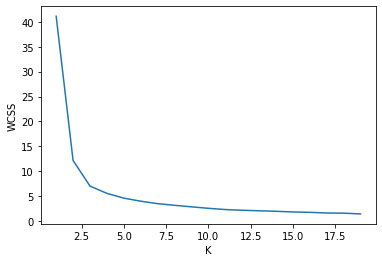

In [20]:
plt.xlabel('K')
plt.ylabel('WCSS')
plt.plot(K,wss)

predicting the model

In [27]:
km=KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_scale[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

Plotting the model

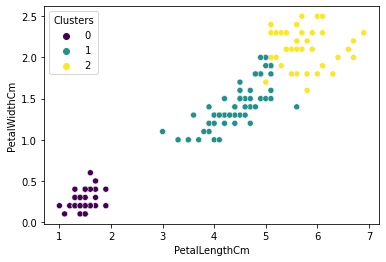

In [29]:
data['Clusters'] = km.labels_

sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm",hue = 'Clusters',  data=data,palette='viridis')